# Penguins classification

#### Authors: Marková, Pěstová, Pronevich, Sokol



Importing all needed packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from joblib import dump, load

seed = 777

## Data reading and understanding

In [2]:
path_to_data = "../data/raw.csv"

try:
    df_penguins = pd.read_csv(path_to_data)
except:
    df_penguins = pd.read_csv('https://raw.githubusercontent.com/hmarkova/DataX_2023/main/data/raw.csv')


In [3]:
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
358,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
359,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
360,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
361,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [4]:
df_penguins.describe(include="all") 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,363,363,358.000000,358.000000,357.000000,358.000000,349,363.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,female,NaN
freq,160,170,NaN,NaN,NaN,NaN,175,NaN
mean,NaN,NaN,43.926257,17.205587,200.451261,4173.743017,NaN,2007.991736
std,NaN,NaN,5.441240,1.951749,14.000754,796.395388,NaN,0.829323
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.350000,15.700000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.500000,197.000000,3950.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4743.750000,NaN,2009.000000


In [5]:
df_penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

As can be see, there are wrong data types. 

In [6]:
df_penguins = df_penguins.convert_dtypes()
df_penguins["species"] = df_penguins["species"].astype("category")
df_penguins["island"] = df_penguins["island"].astype("category")
df_penguins["sex"] = df_penguins["sex"].astype("category")
df_penguins["year"] = df_penguins["year"].astype("category")
df_penguins.dtypes

species              category
island               category
bill_length_mm        Float64
bill_depth_mm         Float64
flipper_length_mm     Float64
body_mass_g             Int64
sex                  category
year                 category
dtype: object

There are also some missing values and duplicated rows, therefore all of these rows will be dropped from the dataset.

After dropping the rows new dataset has 377 rows.

In [7]:
print("Number of dupliated rows: ",df_penguins.duplicated().sum())
print("\nNumber of missing values in each column: ")
print(df_penguins.isna().sum())

df_penguins = df_penguins.drop_duplicates()
df_penguins = df_penguins.dropna()

Number of dupliated rows:  13

Number of missing values in each column: 
species               0
island                0
bill_length_mm        5
bill_depth_mm         5
flipper_length_mm     6
body_mass_g           5
sex                  14
year                  0
dtype: int64


## Data visualization

Distribution of the target variable Species.

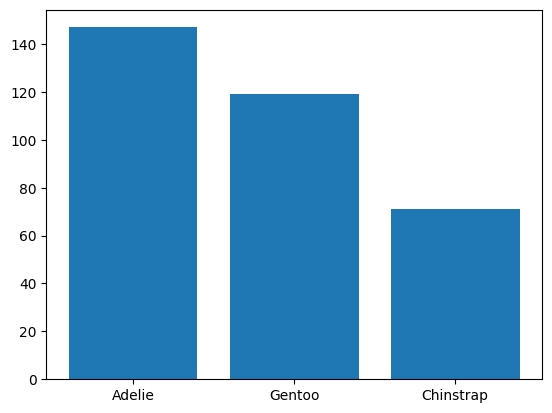

In [8]:
species = df_penguins["species"].value_counts()
plt.bar(species.index, species.values , align = "center")
plt.show()

Distribution of other categorial 

Text(0, 0.5, 'Count')

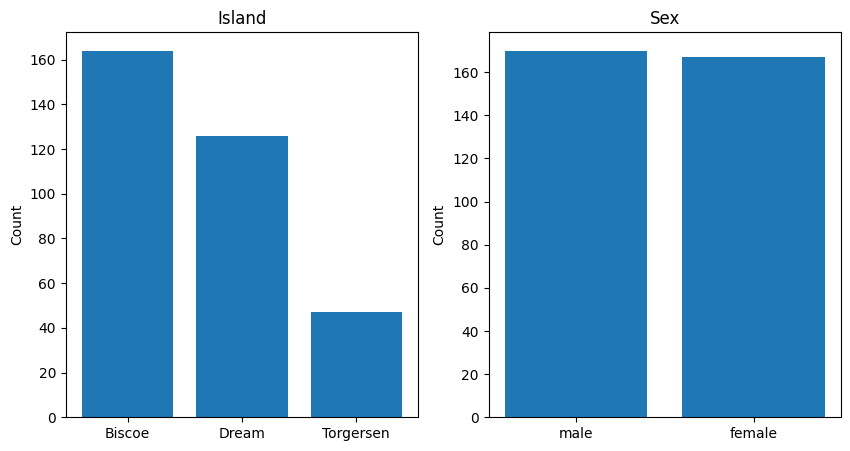

In [9]:
island = df_penguins["island"].value_counts()
sex = df_penguins["sex"].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(island.index, island.values, align="center") 
axs[0].set_title("Island")
axs[0].set_ylabel("Count")

axs[1].bar(sex.index, sex.values, align="center") 
axs[1].set_title("Sex")
axs[1].set_ylabel("Count")

Proportion of species on each island

<Axes: xlabel='island'>

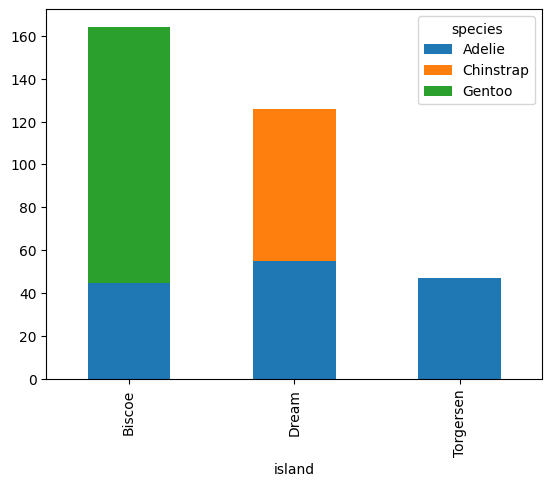

In [10]:
grouped = df_penguins.groupby(["island", "species"]).size().unstack(fill_value=0)
grouped.plot(kind="bar", stacked=True)

Histograms and scatter plosts of the continuous variable, all colored by type of the species.

c:\Users\Jakub\Desktop\Python\Data_X\venv\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Jakub\Desktop\Python\Data_X\venv\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
c:\Users\Jakub\Desktop\Python\Data_X\venv\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Jakub\Desktop\Python\Data_X\venv\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes w

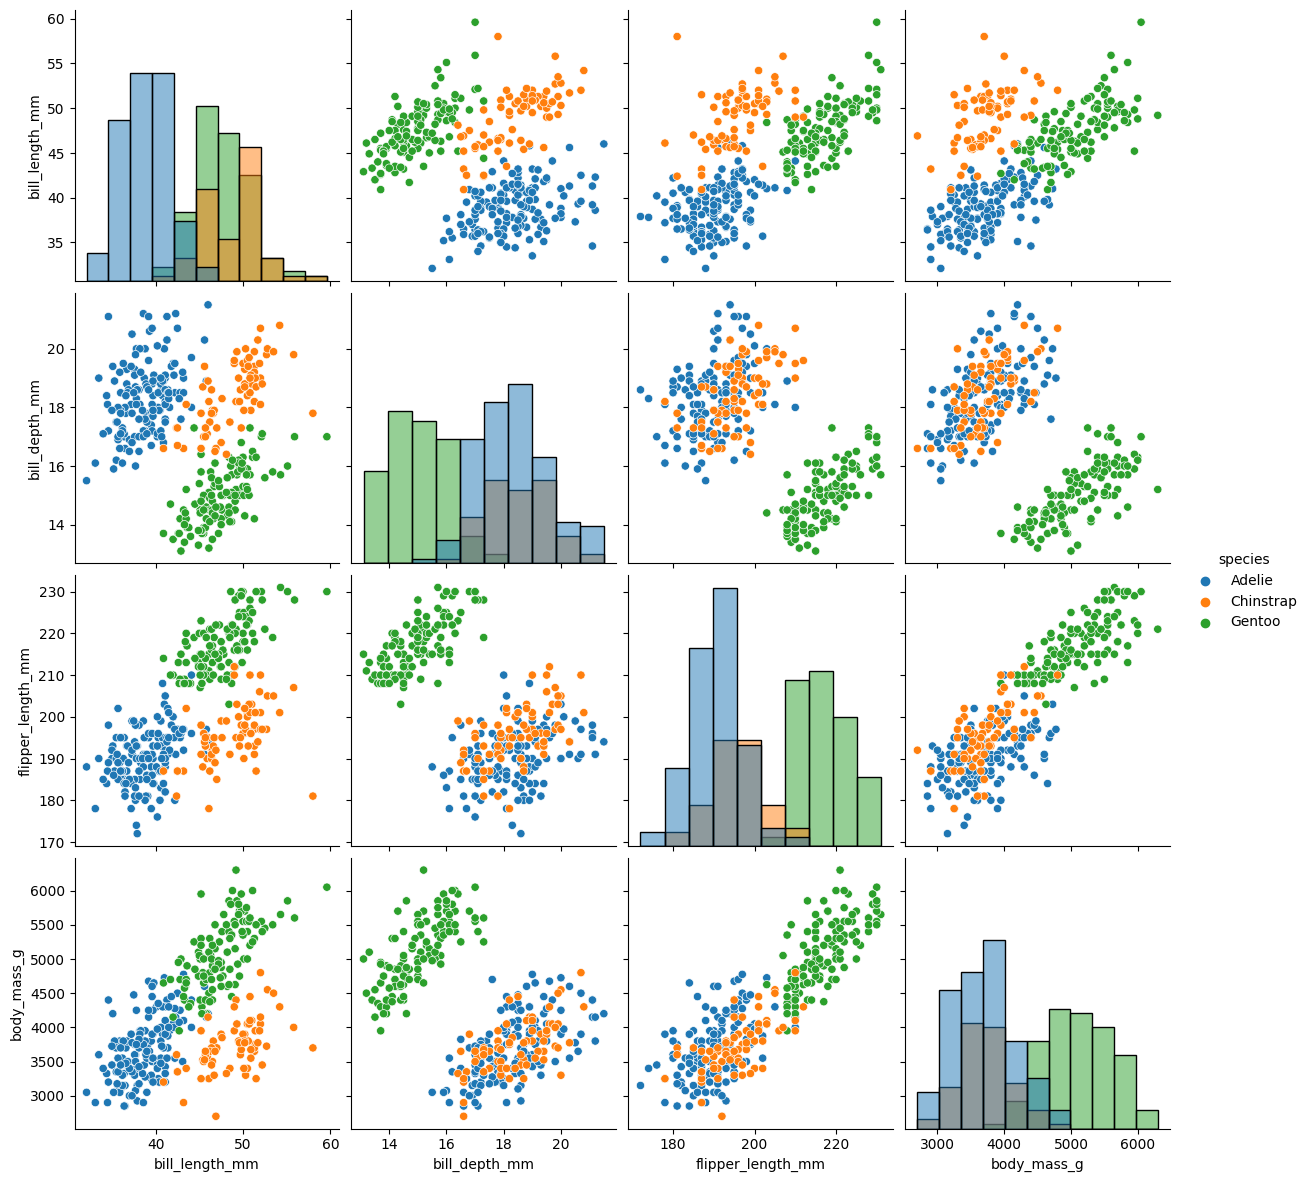

In [11]:
sns.pairplot(df_penguins, hue="species",diag_kind="hist",height=3)
plt.show()

We also made a corellation matrix. At first glance we can see a very high positive dependence of the variables flipper_length_mm and body_mass_g.

C:\Users\Jakub\AppData\Local\Temp\ipykernel_16028\1441989501.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_penguins.corr()


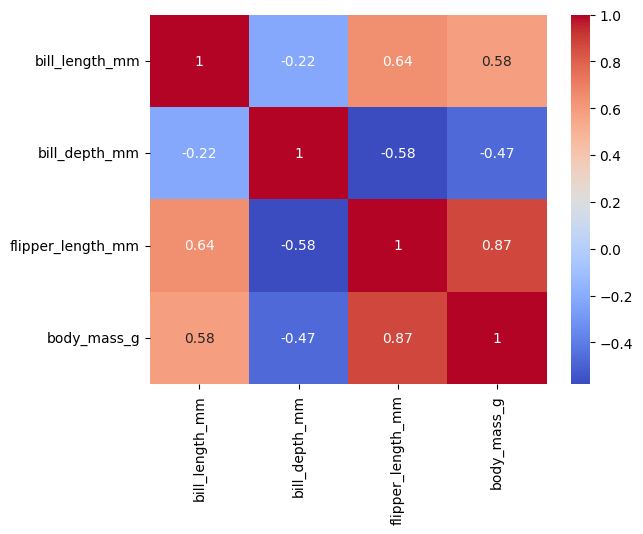

In [12]:
corr = df_penguins.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Getting dummies

In [13]:
df_penguins = pd.get_dummies(df_penguins, columns=["island","sex","year"], drop_first=True)

Saving processed data

In [ ]:
df_penguins.to_csv('../data/processed.csv', index=False)

## Splitting dataset into training (70%) and validation (30%) set.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(df_penguins.drop('species', axis=1), df_penguins['species'], test_size=0.3, random_state=seed)

Normalizing the continues data. The normalization scale was created on training data only to avoid data leakage.

In [15]:
norm = MinMaxScaler()
norm.fit(X_train[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]])
X_train[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]] = norm.transform(X_train[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]])
X_val[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]] = norm.transform(X_val[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]])


In [ ]:
df_interim = pd.DataFrame()
X_train["species"] = y_train
df_interim = df_interim.append(X_train)
X_val["species"] = y_val
df_interim = df_interim.merge(X_val, how='outer')
df_interim.to_csv('../data/interim.csv', index=False)

## Modeling

We are going to use 3 models - Random Forest, Logistic Regression and Gradient Boosting.


In [16]:
lr_clf = LogisticRegression(random_state=seed)
rf_clf = RandomForestClassifier(random_state=seed)
gb_clf = GradientBoostingClassifier(random_state=seed)

For each model, we will tune its hyperparameters based on Bayesian Optimization. Also we use 5-fold Cross Validation.

In [17]:
lr_param_grid = {
    'fit_intercept': Categorical([True, False]),
    'C': Real(0.001, 1000),
    'penalty': Categorical(['l2', 'none'])
}

rf_param_grid = {
    'n_estimators': Integer(1, 1000),
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(1, 15),
    'max_features': Integer(3, X_train.shape[1]),
    'min_samples_leaf': Integer(5, 500)
}

gb_param_grid = {
    'n_estimators': Integer(1, 1000),
    'max_depth': Integer(1, 15),
    'learning_rate': Real(0.001, 100),
    'min_samples_leaf': Integer(5, 500),
    'max_features': Integer(3, X_train.shape[1])
}

lr_search = BayesSearchCV(
    estimator=lr_clf,
    search_spaces=lr_param_grid,
    n_iter=100,
    cv=5,
    random_state=seed,
    n_jobs=-1
)

rf_search = BayesSearchCV(
    estimator=rf_clf,
    search_spaces=rf_param_grid,
    n_iter=100,
    cv=5,
    random_state=seed,
    n_jobs=-1
)

gb_search = BayesSearchCV(
    estimator=gb_clf,
    search_spaces=gb_param_grid,
    n_iter=100,
    cv=5,
    random_state=seed,
    n_jobs=-1
)

Fitting the models

In [18]:
lr_search.fit(X_train, y_train)
rf_search.fit(X_train, y_train)
gb_search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=777),
              n_iter=100, n_jobs=-1, random_state=777,
              search_spaces={'learning_rate': Real(low=0.001, high=100, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=15, prior='uniform', transform='normalize'),
                             'max_features': Integer(low=3, high=9, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=5, high=500, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=1000, prior='uniform', transform='normalize')})

Now we have the models with best parametrs. In next step are pirnted the best models for each type of the model with it's best hyperparametrs and with score.

In [19]:
print('Logistic Regression:')
print('Best model:', lr_search.best_estimator_)
print('Best score:', lr_search.best_score_)
print('Random Forest:')
print('Best model:', rf_search.best_estimator_)
print('Best score:', rf_search.best_score_)
print('Gradient Boosting:')
print('Best model:', gb_search.best_estimator_)
print('Best score:', gb_search.best_score_)

Logistic Regression:
Best model: LogisticRegression(C=848.4509333096364, random_state=777)
Best score: 1.0
Random Forest:
Best model: RandomForestClassifier(criterion='entropy', max_depth=14, max_features=3,
                       min_samples_leaf=6, n_estimators=1000, random_state=777)
Best score: 0.9829787234042552
Gradient Boosting:
Best model: GradientBoostingClassifier(learning_rate=0.001, max_features=3,
                           min_samples_leaf=5, n_estimators=1000,
                           random_state=777)
Best score: 0.9914893617021276


Saving trained models into h5 file for later use.

In [28]:
dump(lr_search.best_estimator_, '../models/lr_model.h5')
dump(rf_search.best_estimator_, '../models/rf_model.h5')
dump(gb_search.best_estimator_, '../models/gb_model.h5')

['lr_model.h5']

Now is the later, so we are loading them back. 8)

In [29]:
lr_model = load('../models/lr_model.h5')
rf_model = load('../models/rf_model.h5')
gb_model = load('../models/gb_model.h5')

# Evaluation

The best models is Logistics Regression, which gave us almost 100% accuracy on the validation dataset. 

In [30]:
y_pred = lr_model.predict(X_val)
report = classification_report(y_val, y_pred)
print('Logistic Regression metrics:')
print(report)


Logistic Regression metrics:
              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        47
   Chinstrap       0.96      1.00      0.98        24
      Gentoo       1.00      1.00      1.00        31

    accuracy                           0.99       102
   macro avg       0.99      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102



As can be seen below in the confusion matrix, our Logistic Regrassion model indeed classifies and distinguishes between every of the species.

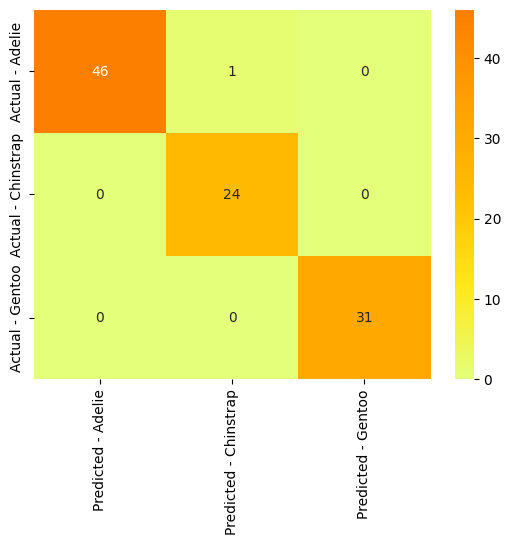

In [27]:
confm = pd.DataFrame(confusion_matrix(y_val, lr_model.predict(X_val))).rename(
                                        columns = {0: 'Predicted - Adelie',1: 'Predicted - Chinstrap',2: 'Predicted - Gentoo'},
                                        index = {0: 'Actual - Adelie',1: 'Actual - Chinstrap',2: 'Actual - Gentoo'})

sns.heatmap(confm, annot = True, cmap ='Wistia', fmt = 'g')
plt.show()